# Micrograd
**The 20th Summer Project**

**Noted and Created by Han summer 2024**

Based on Karpathy's Micrograd library

Micrograd itu basically is a automatic gradient engine. 

It implements backprop, algoritma yang mengevaluasi gradient dari sebuah lossfunction in respect of the weights in NN. Jadi used for tune the weight to minimize the loss

Backpropagation -> Start from behind, goes backward through the mathematical equation, recursively apply calculus chain rule.

Example:

Input a and b

math expressions made up lol

In [ ]:
from micrograd.engine import Value

a = Value(-4.0)
b = Value(2.0)
c = a + b
d = a * b + b**3
c += c + 1
c += 1 + c + (-a)
d += d * 2 + (b + a).relu()
d += 3 * d + (b - a).relu()
e = c - d
f = e**2
g = f / 2.0
g += 10.0 / f
print(f'{g.data:.4f}') # prints 24.7041, the outcome of this forward pass
# Sekarang backward pass, mengetahui pengaruh a dan b terhadap g dalam fungsi math diatas
g.backward()

In [ ]:
#dg/da = seberapa pengaruh a ke g kalau kita "sentil"/perubahan value a dikit kearah positif terhadap g
print(f'{a.grad:.4f}') # prints 138.8338, berarti if we slightly nudge value a larger, g akan naik dan kemiringan/slope dari kenaikan itu 138
#dg/db = seberapa pengaruh b ke g kalau kita "sentil"/perubahan value b dikit kearah positif terhadap g
print(f'{b.grad:.4f}') # prints 645.5773, berarti b value slightly larger, the slope of the growth of g is 645

ini menjelaskan how g will respond if a and b get tweaked slightly in positive direction

Neural network (NN) -> basically just class of math expressions

Backpropagation -> ga selalu dalam NN, yang penting itu tentang math expression

Micrograd cuman basic inti neural network training, pengembangnya itu tentang efisiensi

## Introduction to the value, forward pass, derrivative, and the structure of various chained math expression

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Coba buat fungsi random
def f(x):
    return 3*x**2-4*x+5

In [3]:
f(3.0)

20.0

In [4]:
#Set of scalar values
xs=np.arange(-5,5,0.25) # -5 sampai 5 (except 5) dengan interval 0.25
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
#Feed ke fungsi
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

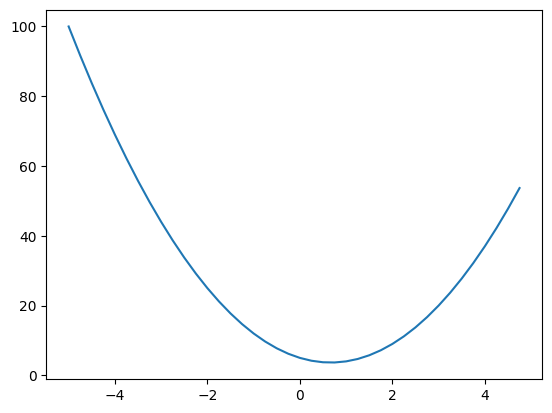

In [6]:
plt.plot(xs,ys)

No one actually derives the derivative function written in the code

derivative math notation

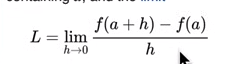

Basically if you slightly increase a (the x value) by the h value, how the function would respond (sensitivity/what is the slope of the respond)

Selisih f(a+h) dengan f(a) kemudian di normalize dengan h nya (dibagi)

In [7]:
f(3.0) #Before

20.0

In [8]:
h=0.001
x=3.0
f(x+h)
#Cek gimana respond dari fungsi f terhadap perubahan x yang awalnya 3 kita naikin dikit (h=0.001)

20.014003000000002

In [9]:
f(x+h)-f(x) #Perubahan nilai f karena perubahan x

0.01400300000000243

Derivative , math expression of finding derrivative vs directly derives the function

In [10]:
(f(x+h)-f(x))/h #Slope dari perubahan nilai f karena perubahan x, math expression of derrivative

14.00300000000243

In [11]:
def df(x): #directly derivative of f
    return 6*x-4
df(3.0) #Analytical

14.0

Kalo liat dari plotnya, sekitar value 2/3 itu slopenya udah deket 0, jadi kalo udah 0 fungsinya gakan respon apa apa terhadap perubahan

In [12]:
h=0.000001
x=2/3
(f(x+h)-f(x))/h #Numerical

2.999378523327323e-06

---

In [13]:
# Let's get more complex
a=2.0
b=-3.0
c=10.0
d=a*b+c
d

4.0

In [14]:
# Look at derivative of d with respect to a , b, and c
h=0.000001

#Inputs, value we interest
a=2.0
b=-3.0
c=10.0

d1=a*b+c

#Take a look d in respect of a
a_h=a+h #a bumped up by h

d2=a_h*b+c 
#secara intuisi d2 turun dibanding d1, karena a will be slightly positive, and b is negative karena dikali 
#jadi angka hasil perkaliannya bakal lebih negatif dari sebelumnya, sehingga pas dijumlahin dengan c bakal hasilnya lebih rendah daripada fungsi awal, 
# #jadi harusnya d bakal turun hasilnya, jadi slopenya negatif

print('d1: ',d1) 
print('d2: ',d2) 
#dd/da (turunan d terhadap a), secara intuisi harusnya ini -3 (b value) karena kalau turunan d terhadap da itu hasilnya b
print('Slope: ',(d2-d1)/h) 
#Slope negatif, berarti a naik, d turun

d1:  4.0
d2:  3.9999969999999996
Slope:  -3.000000000419334


In [15]:
#Bump b by h to see the effect of b value to d
b_h=b+h
d3=a*b_h+c
print('d1: ',d1)
print('d3: ',d3)
#dd/db (turunan d terhadap b), secara intuisi harusnya ini 2 (a value) karena kalau turunan d terhadap db itu hasilnya a
print('Slope: ',(d3-d1)/h)

d1:  4.0
d3:  4.000002
Slope:  2.000000000279556


In [16]:
#Bump c by h to see the effect of c value to d
c_h=c+h
d4=a*b+c_h
print('d1: ',d1)
print('d4: ',d4)
print('Slope: ',(d4-d1)/h) # dd/dc=1

d1:  4.0
d4:  4.000000999999999
Slope:  0.9999999992515995


NN time, massive math expression, jadi butuh data structure

In [17]:
#(OOP) Basic Value Class with init (storing the data, its operation, and children), repr, add, multiplication
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        return out
    

In [18]:
a=Value(2.0,label='a')
a

Value(data=2.0)

In [19]:
b=Value(-3.0,label='b')
b

Value(data=-3.0)

In [20]:
a+b #python will call internaly a.__add__(b)

Value(data=-1.0)

In [21]:
a*b #python will call internaly a.__mul__(b)

Value(data=-6.0)

In [22]:
c=Value(10.0,label='c')
d=a*b+c #python will call internaly a.__mul__(b).__add__(c)
d

Value(data=4.0)

In [23]:
d._prev #jadi ketahuan angka apa aja yang hitung fungsi d (-6.0 itu dari a*b, 10.0 itu dari c)

{Value(data=-6.0), Value(data=10.0)}

In [24]:
d._op #jadi ketahuan operasi apa yang dilakukan untuk menghasilkan d

'+'

Visualize math expression

In [25]:
# A bunch of scary code for visualizing the math expression
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

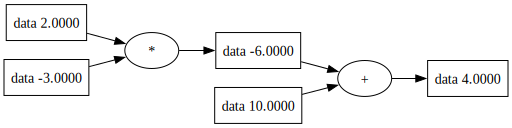

In [26]:
draw_dot(d)

After add label to graph

In [27]:
e=a*b ; e.label='e'
d=e+c ; d.label='d'
#For adding the label to graph

In [28]:
#Add label
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

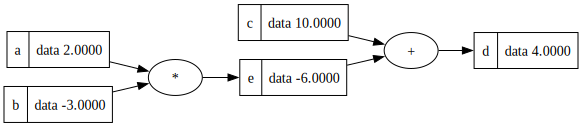

In [29]:
draw_dot(d)

Jadi mirip neural net

Lets make the expression deeper

In [30]:
f=Value(-2.0,label='f')
L = d*f
L ; L.label='L' #notedbyhan

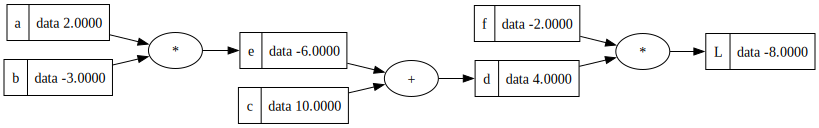

In [31]:
draw_dot(L)

## Now lets do backprop, the manual back prop one.

In [32]:
#Adding grad to the graph
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

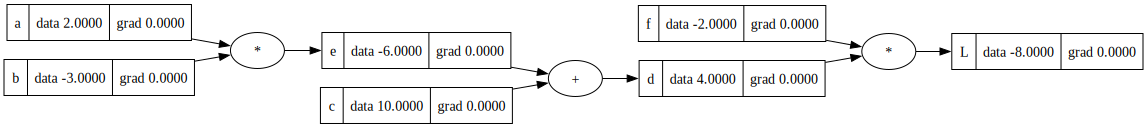

In [33]:
draw_dot(L)

Start from behind, L first.

In [34]:
#This is the values initialization before
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b ; e.label='e'
d=e+c ; d.label='d'
f=Value(-2.0,label='f')
L = d*f ;L.label='L'
L

Value(data=-8.0)

Intuition example:

What is the derrivative L in respect of L, dL/dL? 

it means what if the L changes by h amount, how much the L is changes -> basically it is the h itself, so it will be 1

In [35]:
#Biar ga ngerusak global variable jadi kita taro di local variable di function, buat coba coba
def lol():
    h=0.001 #small amount of change
    
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L1=L.data #Take the value of L from the object Value of L
    
    #Changes value a little bit (see where h located)
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b ; e.label='e'
    d=e+c ; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f ; label='L'
    L2=L.data +h
    
    
    print((L2-L1)/h)
lol()

1.000000000000334


In [36]:
#Jadi otomatis L gradientnya 1 jjadi langsung inisialisasi value grad di L
L.grad=1.0

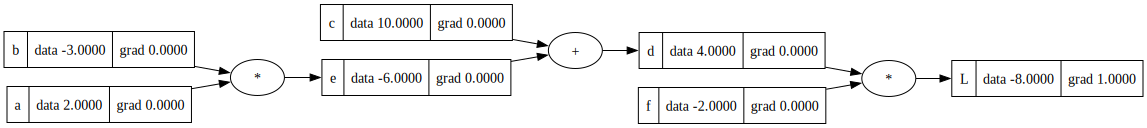

In [37]:
draw_dot(L)

L= d*f -> ya basically L=df

dL/dd =? -> secara calculus kita turunin langsung fungsi L berarti ini f karena kita turunin di variable d

Lets see the math expression 

f(x)=d*f
(f(x+h)-f(x))/h 

= ((d+h) * f - d * f)/ h

= ((d * f + h * f) - d * f)/ h

= (d * f - d * f + h * f) / h

= (h * f)/h  #d*f kurang d*f ya 0 / they cancels out

= f #Hasilnya h / h kan 1 jadi ilang karena perkalian , kasarnya dicoret

In [38]:
#Inisialize grad in f and d
f.grad= 4.0
d.grad= -2.0

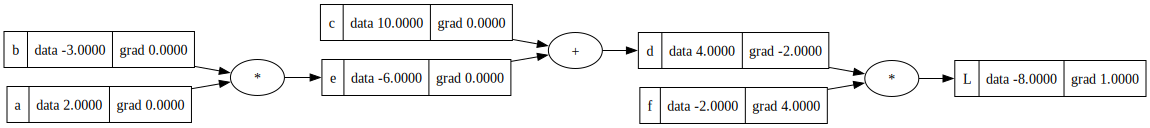

In [39]:
draw_dot(L)

Backward pass

We want to know dL/dc

How to know the effect of c to L if we slightly nudge c to positive direction

Liat urutannya, jadi C mempengaruhi d terus baru d mempengaruhi L

Kita liat dd/dc dan dd/de, this is the local derivative

dd/dc= 1

dd/de= 1

Terus cara mencari dL/dc berarti pakai chain rule

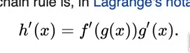

if variable z depends on variable y and y depends on variable x then z depends on x aswell (TRANSITIVE DEPENDENCY gitu) 

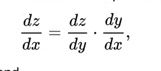

It tells how we chain those derivative together correctly by doing multiplication. (Like to differentiate composition of function, fungsi dalam fungsi kayak f(g(x)) -> h(x) buat gambar 1)

---
dL/dc

diketahui

dL/dd=-2

dd/dc=1

jadi dL/dc = (dL/dd) * (dd/dc)

In [40]:
c.grad= -2.0*1.0
e.grad= -2.0*1.0

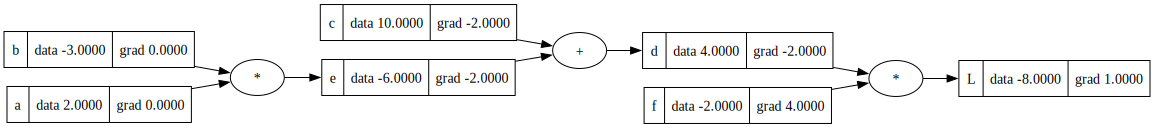

In [41]:
draw_dot(L)
#Kalo plus polanya keliatan dia cuma ngasih grad dari hasil penjumlahannya, liat tuh sama sama -2

dL/db and dL/da

Itu butuh ngelewatin e

jadi rumus chain rulenya

dL/da = (dL/de) * (de/da)

so we need dL/de = -2

now de/da

e=a*b

so de/da would be the b value = -3

so dL/da= (-2.0*-3.0)

dL/db= (dL/de) * (de/db)

de/db would be the a value = 2

so de/db= (-2.0 * 2.0)

In [42]:
a.grad=(-2.0*-3.0)
b.grad= (-2.0 * 2.0)

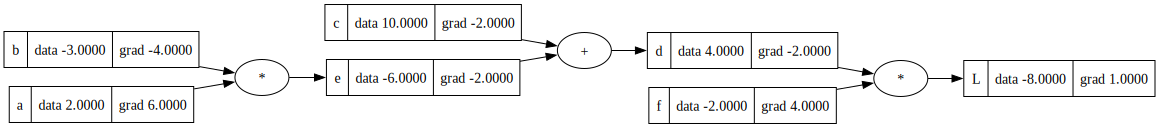

In [43]:
draw_dot(L)

and we are done, so basically backprop it is recursive application of chain rule

### Single optimization step example

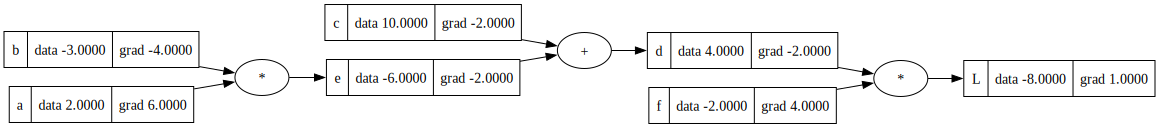

In [44]:
draw_dot(L)

In [45]:
#Untuk membuat L naik ke arah positif maka kita mesti buat value value yang pengaruhin L itu naik ke arah gradientnya, jadi begini
a.data += 0.01 * a.grad
b.data +=0.01 * b.grad
c.data +=0.01 * c.grad
f.data +=0.01 * f.grad

#The forward pass
e=a*b 
d=e+c 
L = d*f
L.data #Hasil forward pass = -7.286496 , tuh kan berubah makin positif angkanya

-7.286496

### Backpropagation onto a neuron

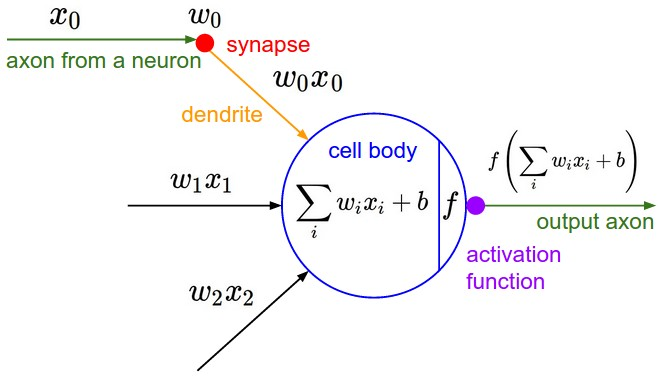
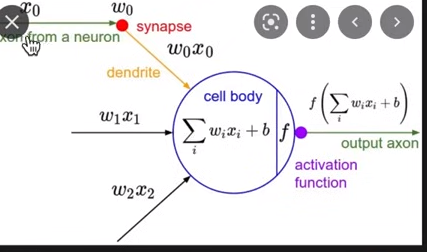

Dari array of x as input bakal di multiply ama weight masing masing terus di jumlahin semua hasilnya, ditambah bias, kemudian hasilnya itu bakal di taro di activation function (like squash function), such as sigmoid, reLU, tanh, etc

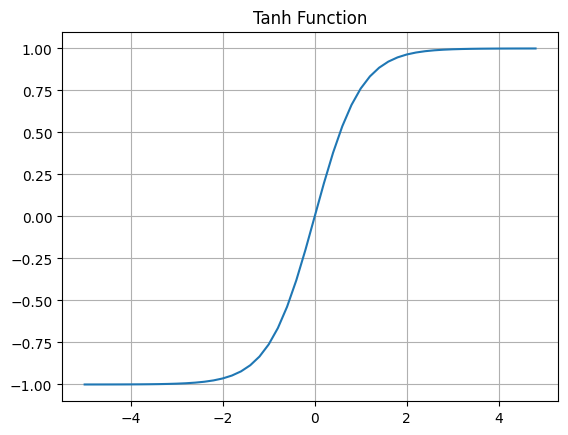

In [46]:
#Tanh example on numpy in graph
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2))); plt.grid()
plt.title('Tanh Function')
plt.show()

rangenya jadi antara -1 sampai 1, when the input to tanh is negative, it would be capped smoothly to -1 and when the input is positive it would be capped smoothly to 1
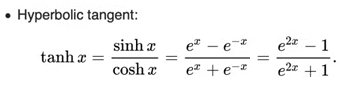
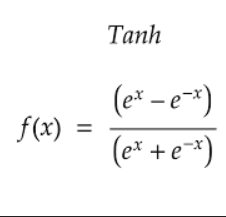

In [47]:
#Basic forwardpass architecture
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

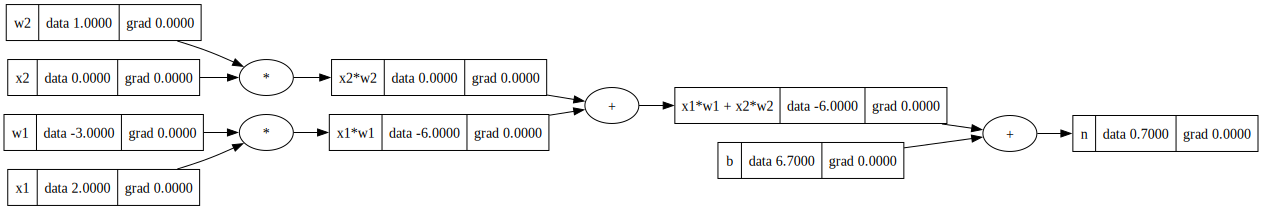

In [48]:
draw_dot(n)

Kurang activation function, jadi kita tambahin activation function ke class value

In [49]:
#Add tanh function
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        return out
    
    #Tanh activation function
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        return out
    

In [50]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8.0, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh()
o

Value(data=0.9640275800758169)

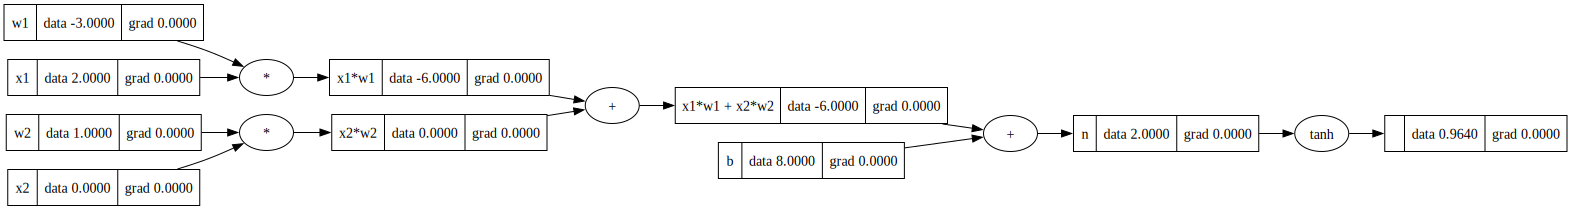

In [51]:
draw_dot(o)

Keliatan tanh in action on squashing those n value (2.0) to 0.96

In [52]:
#Changing the bias
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh() ; o.label='o'
o

Value(data=0.7071067811865476)

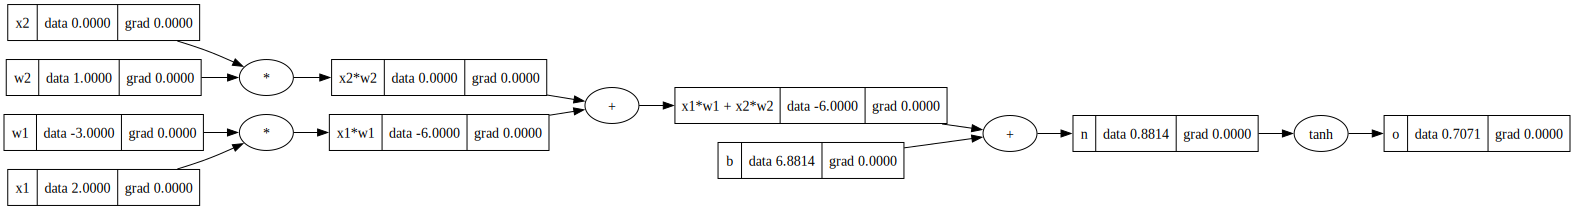

In [53]:
draw_dot(o)

Saatnya backprop

do/dw1

do/dw2

Start with their local derrivative first

In [54]:
#o gradient pasti 1
o.grad=1.0

Dari o ke tanh, harus tau local derrivative of the tanh

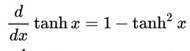

In [55]:
#
#o = tanh(n)
# do/dn = 1-tanh(n)^2
# do/dn = 1-o^2
1-o.data**2

0.4999999999999999

In [56]:
n.grad=0.5

In [57]:
# Sekarang penjumlahan x1w1x2w2+b, jadi gradient dari node penjumlahan hanya distrubusi gradientnya sama ke node input sebelumnya which are x1w1+x2w2 and b
# Jadi gradient 2 node itu sama sama 0.5
x1w1x2w2.grad=0.5
b.grad=0.5

In [58]:
# ke penjumlahan lagi, jadi sama sistemnya dengan sebelumnya
x1w1.grad=0.5
x2w2.grad=0.5

In [59]:
#Ke neuron input dengan perkalian
#Chain rule
x2.grad = x2w2.grad * w2.data  # do/dx2w2 * dx2w2/dx2
w2.grad = x2w2.grad * x2.data  # do/dx2w2 * dx2w2/dw2
x1.grad = x1w1.grad * w1.data  # do/dx1w1 * dx1w1/dx1
w1.grad = x1w1.grad * x1.data  # do/dx1w1 * dx1w1/dw1

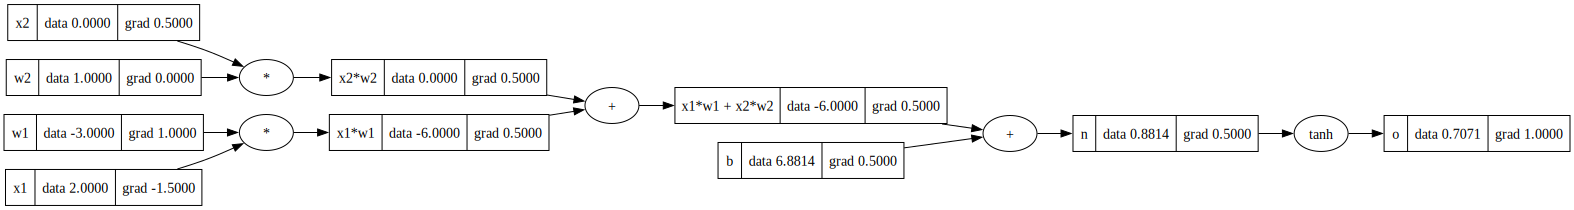

In [60]:
draw_dot(o)

Keliatan disini bahwa w2 ga punya pengaruh karena inputnya 0, kalo inputnya tetep 0 weightnya mau diubah gimanapun gakan ngaruh

kalo w2 mau ngaruh harus x2nya yang diubah, makannya keliatan gradnya 0.5

### It's time to do backprop as a function in the class

In [61]:
# adding self._backward to store the backward pass function and update the gradient
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self._backward= lambda: None #Backward pass, by default fungsi yang tidak ada apa apa (none)
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        def _backward(): #Take out.grad and propagrate it to self.grad and other.grad
            #Dalam penjumlahan kan gradientnya akan sama di 2 node yang dijumlahkan, jadi ya copy aja
            self.grad= 1.0*out.grad 
            other.grad= 1.0*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        
        def _backward():#Take out.grad and propagrate it to self.grad and other.grad
            #Kalo multiply jadi chain rule
            self.grad= other.data*out.grad
            other.grad= self.data*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
            
        return out
    #Tanh activation function , butuh huruf e (2.71828)
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad= (1-t**2)*out.grad #Local derivative of tanh * gradient of the output
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    

In [62]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh() ; o.label='o'

In [63]:
#Call the backward pass, but this still doing in each step, not one function call for all
o.grad=1.0 #Base case
o._backward() 
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward() 


#Nothing would happen here because b is the leaf node
b._backward() 
w2._backward() 
x2._backward() 
w1._backward() 
x1._backward() 

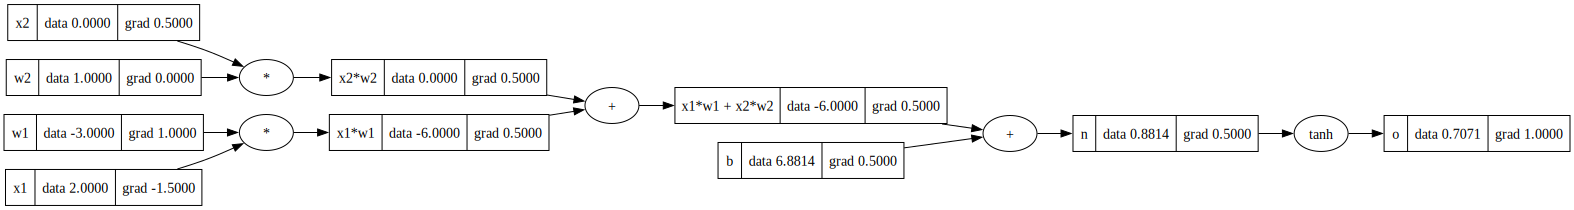

In [64]:
draw_dot(o)

Biar otomatis jalan dari ujung belakang ke depan, harus berurutan untuk memastiklan itu diperlukan **Topological Sort**

Topological sort adalah cara untuk menyusun simpul-simpul (node-node) dalam sebuah graf berarah (directed graph) sehingga setiap node muncul sebelum node lain yang bergantung padanya. Basically laying out the graph with nodes and all the edges goes from left to right (only one way)

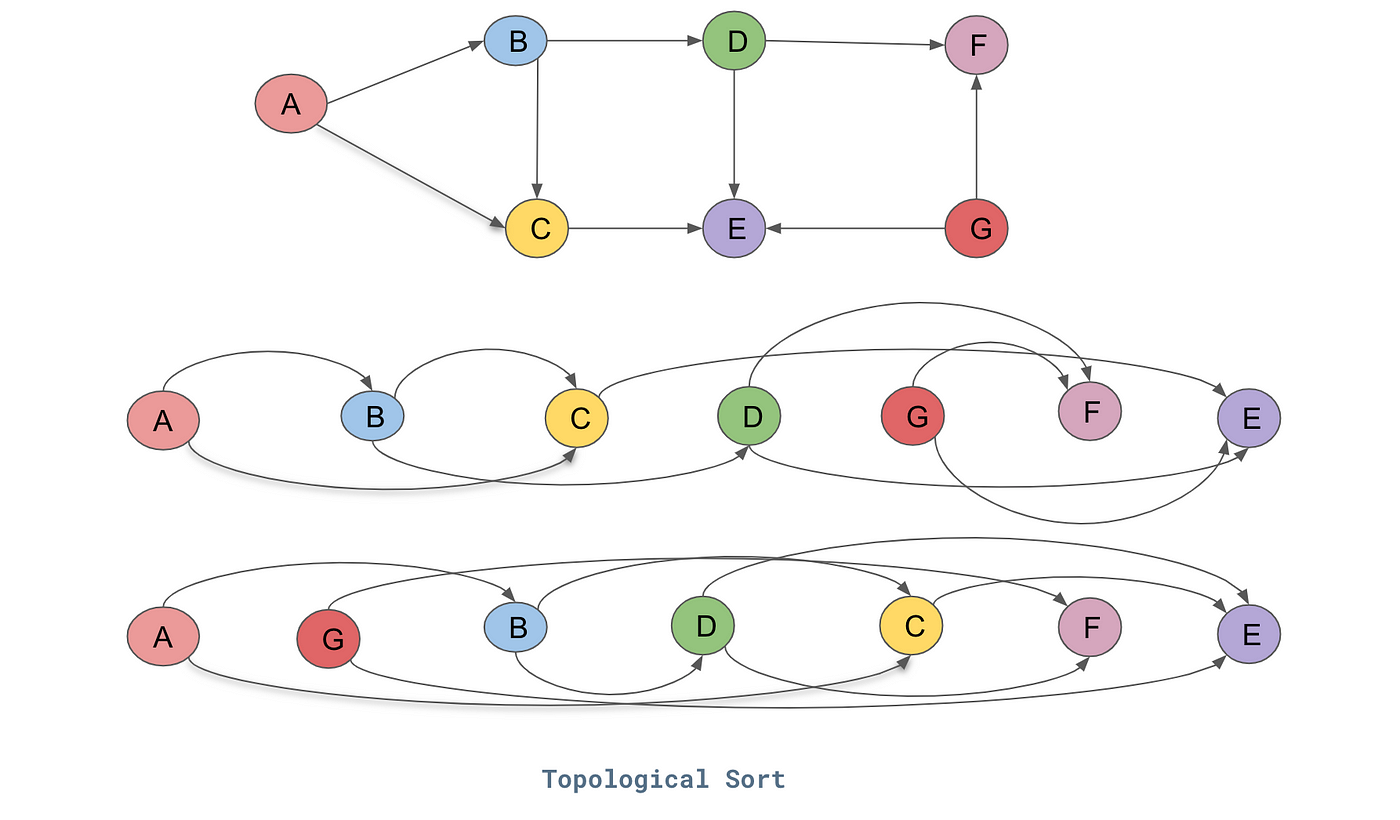

In [65]:
#Code for topological sort
topo = []
visited = set()
def build_topo(v): 
    if v not in visited: #Keep track of visited note, put the node in visited
        visited.add(v)
    for child in v._prev: #After that go through the children first
        build_topo(child) #Call the function again with the children as output
    topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
build_topo(o) #start from the output node (the last leaf node)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

Perhatiin semua panah dari kiri ke kanan dari setiap nodenya

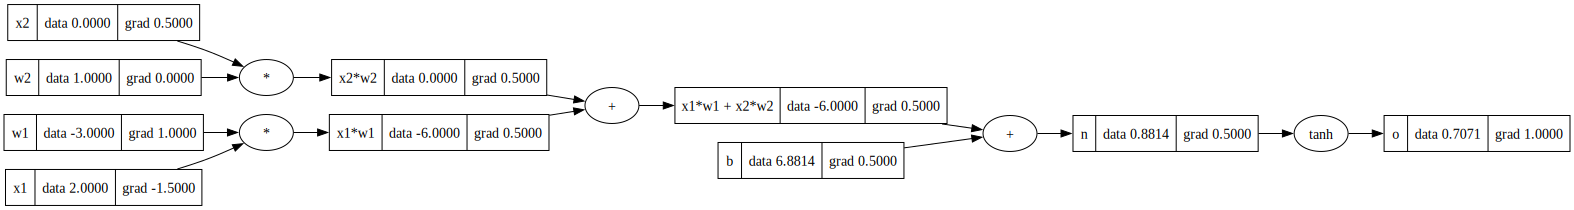

In [66]:
draw_dot(o)

In [67]:
#Reset grad dulu
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh() ; o.label='o'

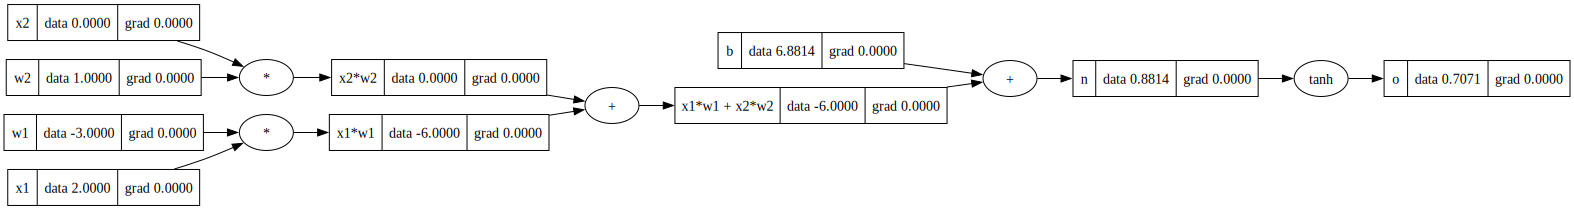

In [68]:
draw_dot(o)

In [69]:
#Buat backward berarti
#Set o grad dulu sebagai basecase
o.grad=1.0
#Build the topological sort
#Code for topological sort
topo = []
visited = set()
def build_topo(v): 
    if v not in visited: #Keep track of visited note, put the node in visited
        visited.add(v)
    for child in v._prev: #After that go through the children first
        build_topo(child) #Call the function again with the children as output
    topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
build_topo(o) #start from the output node (the last leaf node)

# Backward pass
# kita balik topologicalnya, jadi call function backwardnya berurutan dari output ke node input
for node in reversed(topo):
    node._backward() #Call the backward pass function for each node in the topological sort

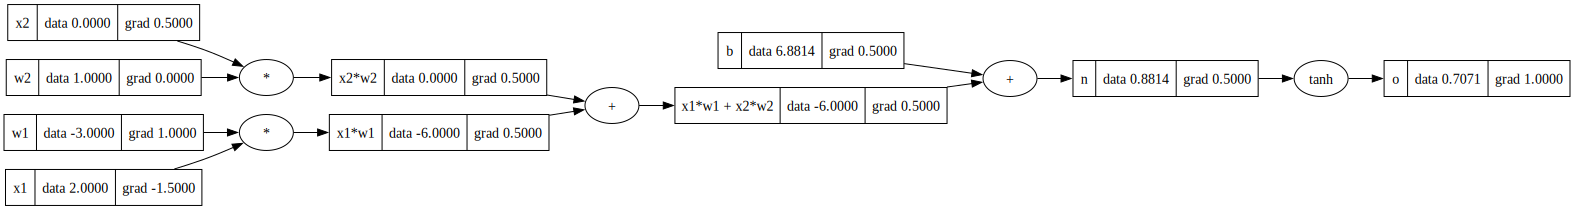

In [70]:
draw_dot(o) #Langsung otomatis backward pass dari ujung ke ujung

Let's add this as a function to the Value class

In [71]:
# Add topological sort to call backward pass to Value class
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self._backward= lambda: None #Backward pass, by default fungsi yang tidak ada apa apa (none)
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        def _backward(): #Take out.grad and propagrate it to self.grad and other.grad
            #Dalam penjumlahan kan gradientnya akan sama di 2 node yang dijumlahkan, jadi ya copy aja
            self.grad= 1.0*out.grad 
            other.grad= 1.0*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        
        def _backward():#Take out.grad and propagrate it to self.grad and other.grad
            #Kalo multiply jadi chain rule
            self.grad= other.data*out.grad
            other.grad= self.data*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
            
        return out
    #Tanh activation function , butuh huruf e (2.71828)
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad= (1-t**2)*out.grad #Local derivative of tanh * gradient of the output
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Topological sort + backward function call
    def backward(self):
        #Build the topological sort first
        topo = []
        visited = set()
        def build_topo(v): 
            if v not in visited: #Keep track of visited note, put the node in visited
                visited.add(v)
            for child in v._prev: #After that go through the children first
                build_topo(child) #Call the function again with the children as output
            topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
        build_topo(self) #start from the self node (should be the last leaf node or output)

        # And then, Backward pass
        #First initialize the basecase (output(self) gradient), this backward() function should be called in output node object (o)
        self.grad=1.0 
        # kita balik topologicalnya, jadi call function backwardnya berurutan dari output ke node input
        for node in reversed(topo):
            node._backward() #Call the backward pass function for each node in the topological sort

In [72]:
#Lets redefine the graph and do the backward pass
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh() ; o.label='o'
o

Value(data=0.7071067811865476)

In [73]:
o.backward() # call all backward

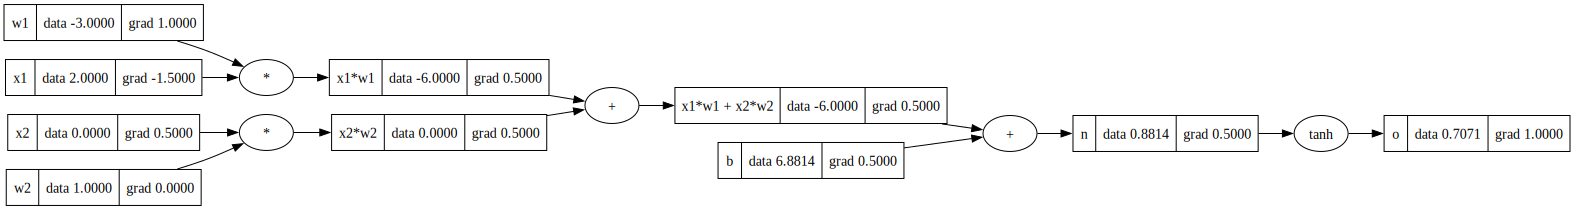

In [74]:
draw_dot(o)

And voila it finished for ONE NEURON :D, but there is a catch, there is a bug

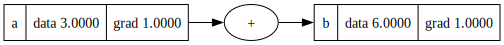

In [75]:
#Watch this
a=Value(3.0,label='a')
b=a+a ; b.label='b'
b.backward()
draw_dot(b)

Harusnya inputnya ada 2 a malah cuman 1, terus gradientnya harusnya 2 karena dijumlahin 2 value yang gradnya 1

Kalo diperhatiin di fungsi add karena b is a result of addition
```python
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad= 1.0*out.grad 
            other.grad= 1.0*out.grad
        out._backward= _backward
        return out
```
kan a + a, self dan other adalah object yang sama,

Sekarang fokus ke _backward() nah disitu self.grad ama other.grad pake '=' berarti grad will always set to 1. Jadi malah overwriting the gradient.

That is the problem

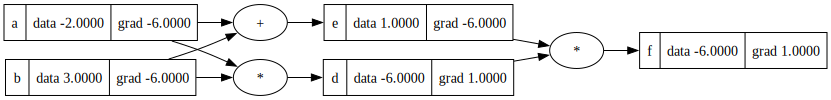

In [76]:
# Contoh lain
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

Gini juga gradientnya salah

So what is happening?

There will be issue when using same variable/object more than once, karena '=' itu tadi yang overwrite grad dalam object yang sama

Solusinya ini adalah multivariable case of the chain rule so replace '=' to accumulate '+='

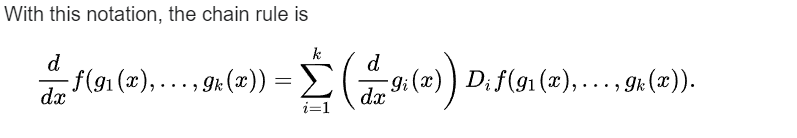

Mari update the value class lagi

In [77]:
#Replace = to += in the backward pass
#Remember the += is will accumulate the contribution from all paths and not overide it (Multivariable chainrule)
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self._backward= lambda: None #Backward pass, by default fungsi yang tidak ada apa apa (none)
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        def _backward(): #Take out.grad and propagrate it to self.grad and other.grad
            #Dalam penjumlahan kan gradientnya akan sama di 2 node yang dijumlahkan, jadi ya copy aja
            self.grad+= 1.0*out.grad 
            other.grad+= 1.0*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Multiply
    def __mul__(self, other):
        out= Value(self.data*other.data,(self,other),'*')
        
        def _backward():#Take out.grad and propagrate it to self.grad and other.grad
            #Kalo multiply jadi chain rule
            self.grad+= other.data*out.grad
            other.grad+= self.data*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
            
        return out
    #Tanh activation function , butuh huruf e (2.71828)
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad+= (1-t**2)*out.grad #Local derivative of tanh * gradient of the output
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Topological sort + backward function call
    def backward(self):
        #Build the topological sort first
        topo = []
        visited = set()
        def build_topo(v): 
            if v not in visited: #Keep track of visited note, put the node in visited
                visited.add(v)
            for child in v._prev: #After that go through the children first
                build_topo(child) #Call the function again with the children as output
            topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
        build_topo(self) #start from the self node (should be the last leaf node or output)

        # And then, Backward pass
        #First initialize the basecase (output(self) gradient), this backward() function should be called in output node object (o)
        self.grad=1.0 
        # kita balik topologicalnya, jadi call function backwardnya berurutan dari output ke node input
        for node in reversed(topo):
            node._backward() #Call the backward pass function for each node in the topological sort

After fix

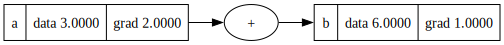

In [78]:
a=Value(3.0,label='a')
b=a+a ; b.label='b'
b.backward()
draw_dot(b)

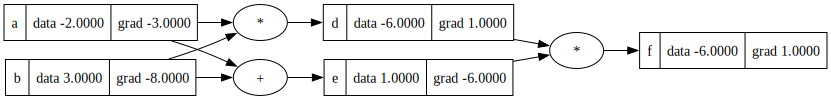

In [79]:
# Contoh lain
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

----

### Breaking up tanh 

Let's come back to the neural network

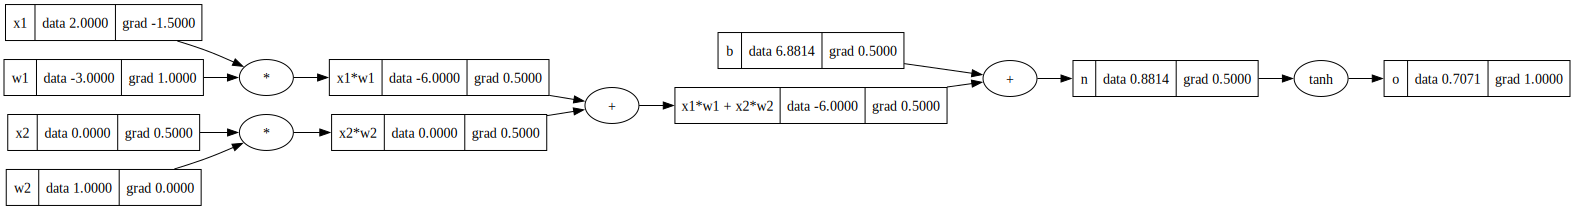

In [80]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o=n.tanh() ; o.label='o'
o.backward()
draw_dot(o)

There is a slight adjusment that we need first before breaking up the tanh

In [83]:
a=Value(2.0)
a+1 
#Would produce error since when we add a int to a Value object, it will call the __add__ method of the Value object, 
#which expects another Value object as input.

AttributeError: 'int' object has no attribute 'data'

In [97]:
#Update class value for the addition of a number int as input in __add__ and __mul__ method, and add rmul method for the reverse multiplication
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self._backward= lambda: None #Backward pass, by default fungsi yang tidak ada apa apa (none)
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        other= other if isinstance(other,Value) else Value(other) #If the other is not a Value object, convert it to Value object
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        
        def _backward(): #Take out.grad and propagrate it to self.grad and other.grad
            #Dalam penjumlahan kan gradientnya akan sama di 2 node yang dijumlahkan, jadi ya copy aja
            self.grad+= 1.0*out.grad 
            other.grad+= 1.0*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Multiply
    def __mul__(self, other):
        other=other if isinstance(other,Value) else Value(other)
        out= Value(self.data*other.data,(self,other),'*')
        
        def _backward():#Take out.grad and propagrate it to self.grad and other.grad
            #Kalo multiply jadi chain rule
            self.grad+= other.data*out.grad
            other.grad+= self.data*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
            
        return out
    
    def __rmul__(self,other): #Other (not Value object) * self
        return self * other #Just call the __mul__ method
    #Tanh activation function , butuh huruf e (2.71828)
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad+= (1-t**2)*out.grad #Local derivative of tanh * gradient of the output
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Topological sort + backward function call
    def backward(self):
        #Build the topological sort first
        topo = []
        visited = set()
        def build_topo(v): 
            if v not in visited: #Keep track of visited note, put the node in visited
                visited.add(v)
            for child in v._prev: #After that go through the children first
                build_topo(child) #Call the function again with the children as output
            topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
        build_topo(self) #start from the self node (should be the last leaf node or output)

        # And then, Backward pass
        #First initialize the basecase (output(self) gradient), this backward() function should be called in output node object (o)
        self.grad=1.0 
        # kita balik topologicalnya, jadi call function backwardnya berurutan dari output ke node input
        for node in reversed(topo):
            node._backward() #Call the backward pass function for each node in the topological sort

In [98]:
a=Value(2.0)
a=a+1
a #It would work this time

Value(data=3.0)

In [99]:
a*3
#a.__mul__(3)

Value(data=9.0)

In [100]:
#But this would not work, because python would call the __mul__ method of the int object, not the Value object
3*a #TypeError: unsupported operand type(s) for *: 'int' and 'Value

# so it will call 3.__mul__(a) which is not supported for value object, we need to add rmul to the Value class
# rmul class will make python checks the __rmul__ method if the __mul__ method of the int object is not supported

Value(data=9.0)

Now let's breaking up the tanh

In [106]:
#Add exp function and divide in the Value class to breakdown tanh function
#Update class value for the addition of a number int as input in __add__ and __mul__ method, and add rmul method for the reverse multiplication
# Add substraction function too
class Value:
    def __init__(self, data,_children=(), _op='', label=''): #Inisiasi value object, data value, _children awalnya empty, _op awalnya empty, add labels to the visualized graph
        self.data=data
        self._backward= lambda: None #Backward pass, by default fungsi yang tidak ada apa apa (none)
        self.grad=0.0 #Gradient, awalnya 0 (means no effect), we assume each initial value has no effect to the final value
        self._prev=set(_children) #Set of children, we need to keep track of what values produce other value (Connected)
        self._op=_op #Operation (String), to keep track of what operation was used to produce this value
        self.label=label #Label 
        
    def __repr__(self): #Representasi (Repr) value object, it's providing nice looking print of the value, not some random address
        return f'Value(data={self.data})'
    
    #Awalnya kalau ada 2 object value, misal a dan b, a+b bakal error karena tidak ada method __add__ yang mendefinisikan operasi penjumlahan
    def __add__(self, other):
        other= other if isinstance(other,Value) else Value(other) #If the other is not a Value object, convert it to Value object
        out= Value(self.data+other.data,(self,other),'+') #This is typical addition not __add__ method
        #Value(self, data= data hasil perhitungan, children= angka yang dihitung/inputnya, _op= operasi yang dilakukan)
        
        def _backward(): #Take out.grad and propagrate it to self.grad and other.grad
            #Dalam penjumlahan kan gradientnya akan sama di 2 node yang dijumlahkan, jadi ya copy aja
            self.grad+= 1.0*out.grad 
            other.grad+= 1.0*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    def __neg__(self): #Unary minus, negation
        return self*-1
     
    #Pengurangan
    def __sub__(self, other): #Substraction (addition of negation)
        return self +(-other) #Just call the __add__ and __neg__ method
    
    #Multiply
    def __mul__(self, other):
        other=other if isinstance(other,Value) else Value(other)
        out= Value(self.data*other.data,(self,other),'*')
        
        def _backward():#Take out.grad and propagrate it to self.grad and other.grad
            #Kalo multiply jadi chain rule
            self.grad+= other.data*out.grad
            other.grad+= self.data*out.grad
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
            
        return out
    
    def __rmul__(self,other): #Other (not Value object) * self
        return self * other #Just call the __mul__ method
     
    #pow
    def __pow__(self, other): #self is the value, other would be the power (self^other)
        #Raise error message if the power is not integer or float. So it forces the input of the power is int/float
        assert isinstance(other, (int,float)), 'Only support integer and float for now' 
        out= Value(self.data**other,(self,other),f'**{other}')
        
        def _backward():
            #Local derrivative uses power rule
            self.grad +=  (other*self.data**(other-1) )*out.grad
        out._backward= _backward
        return out
     
    #Divide
    #a/b = a * 1/b = a * b**-1
    #b**-1 = b^-1 = 1/b
    def __truediv__(self, other):
        return self * other**-1 #needs pow function to be defined in Value class
    
    #Tanh activation function , butuh huruf e (2.71828)
    def tanh(self):
        x=self.data #Value of the object
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad+= (1-t**2)*out.grad #Local derivative of tanh * gradient of the output
        out._backward= _backward #save the backward pass function to the object, jadi berdasarkan operasi, fungsi backward passnya bakal beda beda
        return out
    
    #Exponential function
    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self,), 'exp')
        
        def _backward():
            # de^x/dx = e^x -> the local derrivative of exp, so it is the value itself (which is out.data in this case)
            self.grad += out.data*out.grad #Local derivative of exp * gradient of the output (chain rule)
        out._backward= _backward
        return out
        
   
    
    #Topological sort + backward function call
    def backward(self):
        #Build the topological sort first
        topo = []
        visited = set()
        def build_topo(v): 
            if v not in visited: #Keep track of visited note, put the node in visited
                visited.add(v)
            for child in v._prev: #After that go through the children first
                build_topo(child) #Call the function again with the children as output
            topo.append(v) #After the child has been added or there is no child left, next add itself to the topo list
        build_topo(self) #start from the self node (should be the last leaf node or output)

        # And then, Backward pass
        #First initialize the basecase (output(self) gradient), this backward() function should be called in output node object (o)
        self.grad=1.0 
        # kita balik topologicalnya, jadi call function backwardnya berurutan dari output ke node input
        for node in reversed(topo):
            node._backward() #Call the backward pass function for each node in the topological sort

In [105]:
a=Value(2.0)
b=Value(3.0)
c=a/b
c

Value(data=0.6666666666666666)